In [13]:
import numpy as np
import os

path = os.getcwd()
X_train = np.load(path + "/X_train.npy", mmap_mode='readonly')
X_test = np.load(path + "/X_test.npy", mmap_mode='readonly')
y_train = np.load(path + "/y_train.npy", mmap_mode='readonly')
y_test = np.load(path + "/y_test.npy", mmap_mode='readonly')

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, GridSearchCV

# K-Nearest-Neighbors
K_range = np.linspace(1,50, dtype=int)

In [14]:
# Model using default parameters
default_knn = KNeighborsClassifier()
print("Default Validation Accuracy is %0.3f" % (np.mean(cross_val_score(default_knn, X_train, y_train, cv=5))))

Default Validation Accuracy is 0.583


In [15]:
# Exhaustive grid search to find the hyperparameters that give the highest accuracy
tuned_parameters = dict(n_neighbors=K_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=tuned_parameters, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.3f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 1} with a score of 0.614


In [16]:
# Model using highest accuracy parameters
tuned_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
print("Tuned Validation Accuracy is %0.3f" % (np.mean(cross_val_score(tuned_knn, X_train, y_train, cv=5))))

tuned_knn.fit(X_train, y_train)
print("Final Test Set Accuracy is %0.3f" % tuned_knn.score(X_test, y_test))

Tuned Validation Accuracy is 0.606
Final Test Set Accuracy is 0.610


[3.20629639e-01 2.56874839e-01 1.06339061e-01 6.03007364e-02
 3.71022891e-02 3.38043177e-02 2.74456680e-02 2.11148561e-02
 1.71018160e-02 1.46711467e-02 1.33039123e-02 1.24770282e-02
 1.03446527e-02 9.76480448e-03 8.94688953e-03 8.43415815e-03
 7.91266356e-03 6.83111160e-03 6.72661377e-03 5.95407436e-03
 4.97303233e-03 4.17265225e-03 2.87947013e-03 1.42920554e-03
 3.60218148e-04 1.05143311e-04]


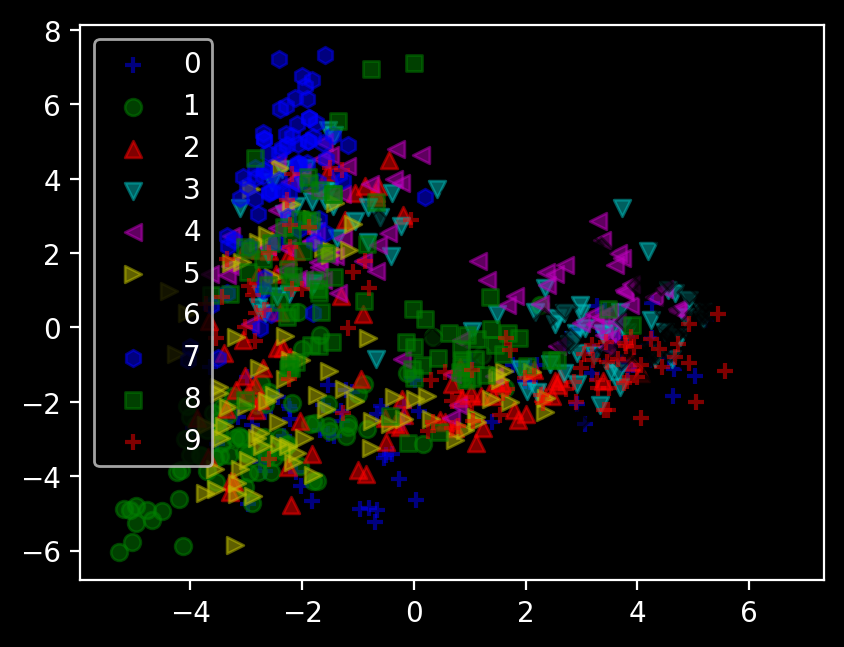

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as py

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y_train), cycle(colors), cycle(markers)):
    py.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], c=c, marker=m, label=i, alpha=0.5)
    
_ = py.legend(loc='best')

In [18]:
# Using PCA features instead of pixels:

pca = PCA(n_components = 10)
pca.fit(X_train)

tX_train = pca.transform(X_train)
tX_test = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1).fit(tX_train, y_train)
train_score = model.score(tX_train, y_train)
print('training score (overfitting!):', train_score)

test_score = model.score(tX_test, y_test)
print('test score:', test_score)

from sklearn import metrics

y_test_pred = model.predict(tX_test)
expected = y_test
predicted = model.predict(tX_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

training score (overfitting!): 0.99875
test score: 0.51
Confusion matrix:
[[12  0  1  0  0  2  2  0  0  3]
 [ 0 15  1  0  0  2  0  0  0  1]
 [ 1  0  8  2  2  3  0  0  3  1]
 [ 0  1  0  6  0  1  1  5  1  5]
 [ 1  0  0  3  9  0  0  2  1  2]
 [ 2  2  1  1  1 11  1  1  2  0]
 [ 2  0  1  1  0  0 12  0  0  1]
 [ 0  0  4  1  3  1  0 14  1  1]
 [ 2  0  4  0  4  0  0  2  8  1]
 [ 0  0  4  1  2  2  2  0  0  7]]


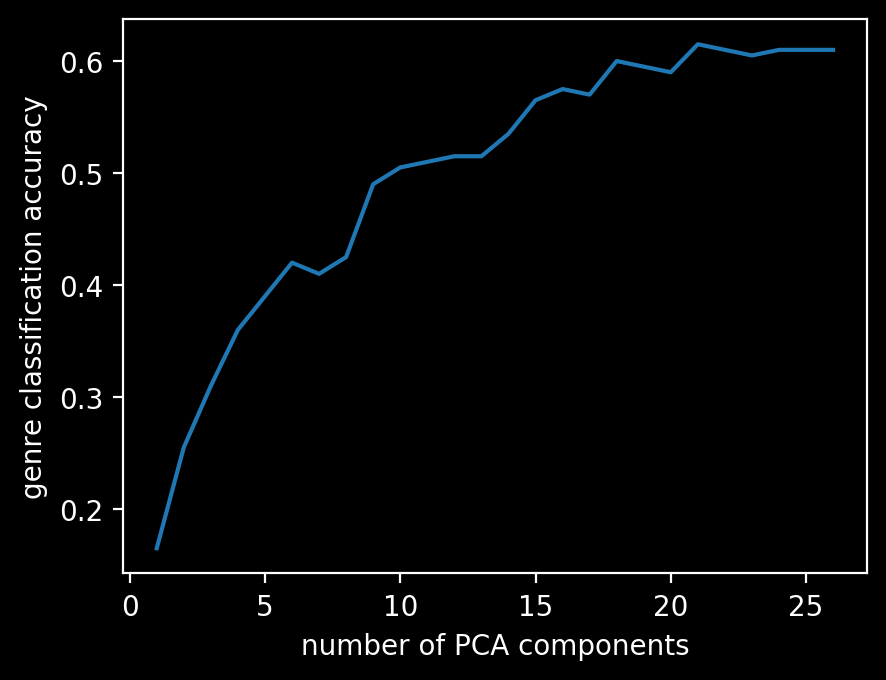

In [1]:
# Plot accuracy vs number of components

accuracy = []
n_comp = range(1,27)
for i in n_comp:
    pca = PCA(n_components=i)
    pca.fit(X_train)
    
    tX_train = pca.transform(X_train)
    tX_test = pca.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=1).fit(tX_train, y_train)
    test_score = model.score(tX_test, y_test)
    accuracy.append(test_score)
    
py.plot(n_comp, accuracy)
_ = py.xlabel('number of PCA components')
_ = py.ylabel('genre classification accuracy')

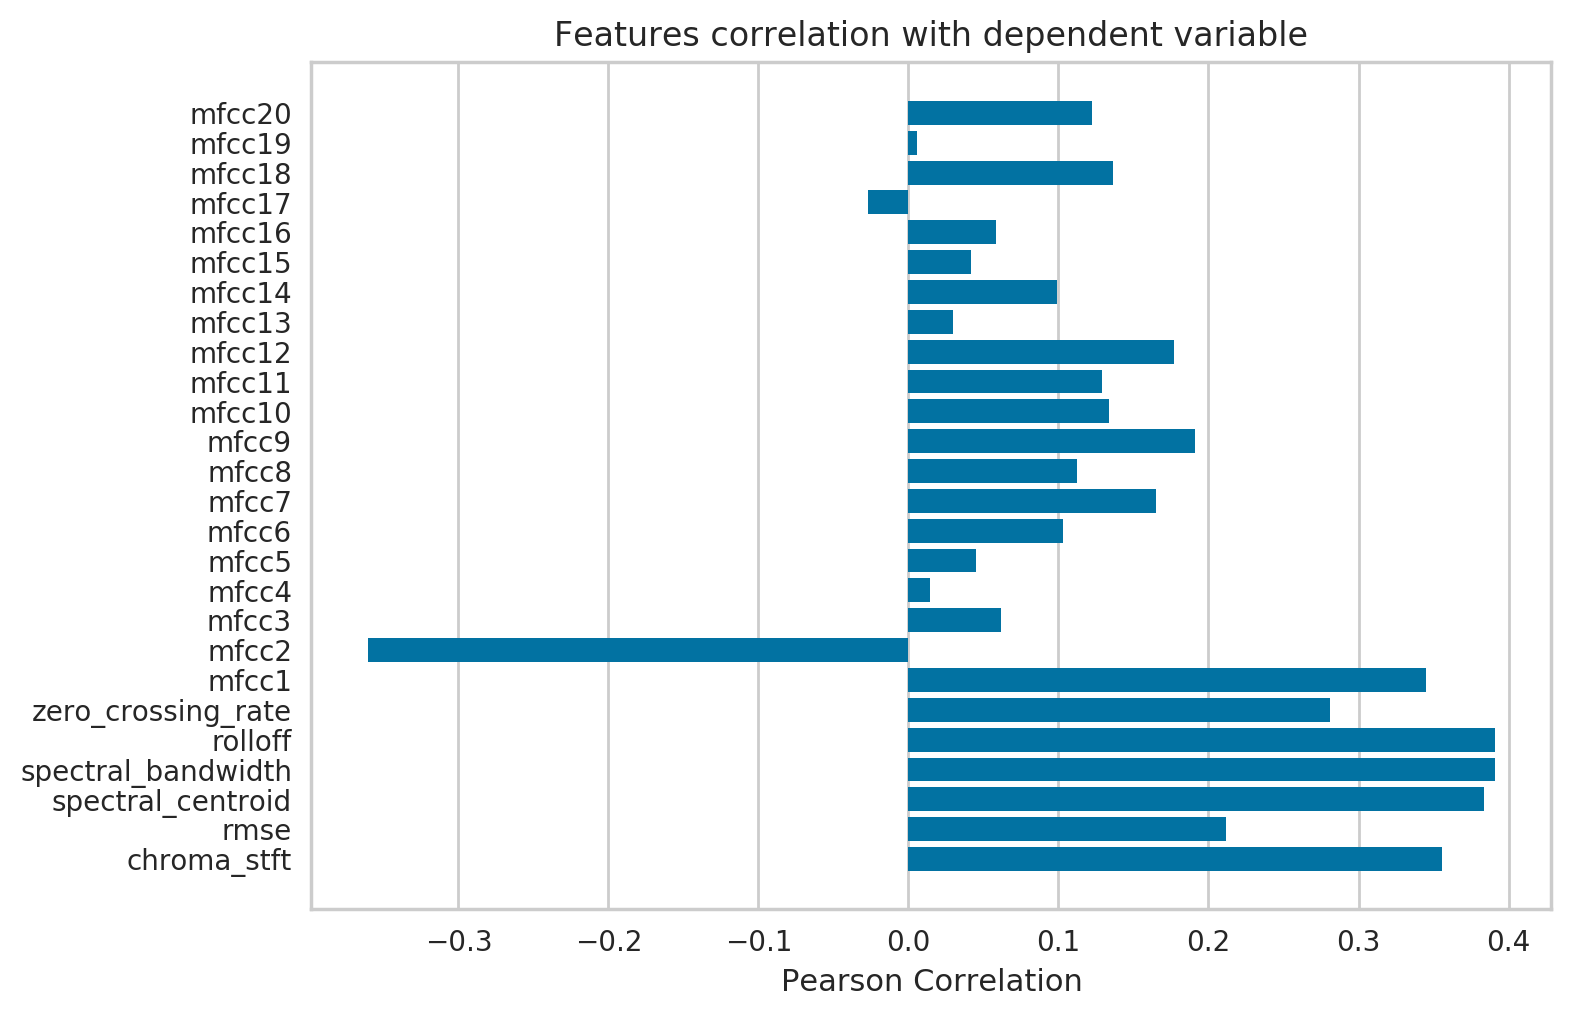

In [58]:
from yellowbrick.target import FeatureCorrelation
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Read in dataset
path = os.getcwd()
data = pd.read_csv(path+'/data.csv')
data = data.drop(['filename'], axis = 1)

# Create a list of the feature names
features = feature_list = data.columns[:-1]

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

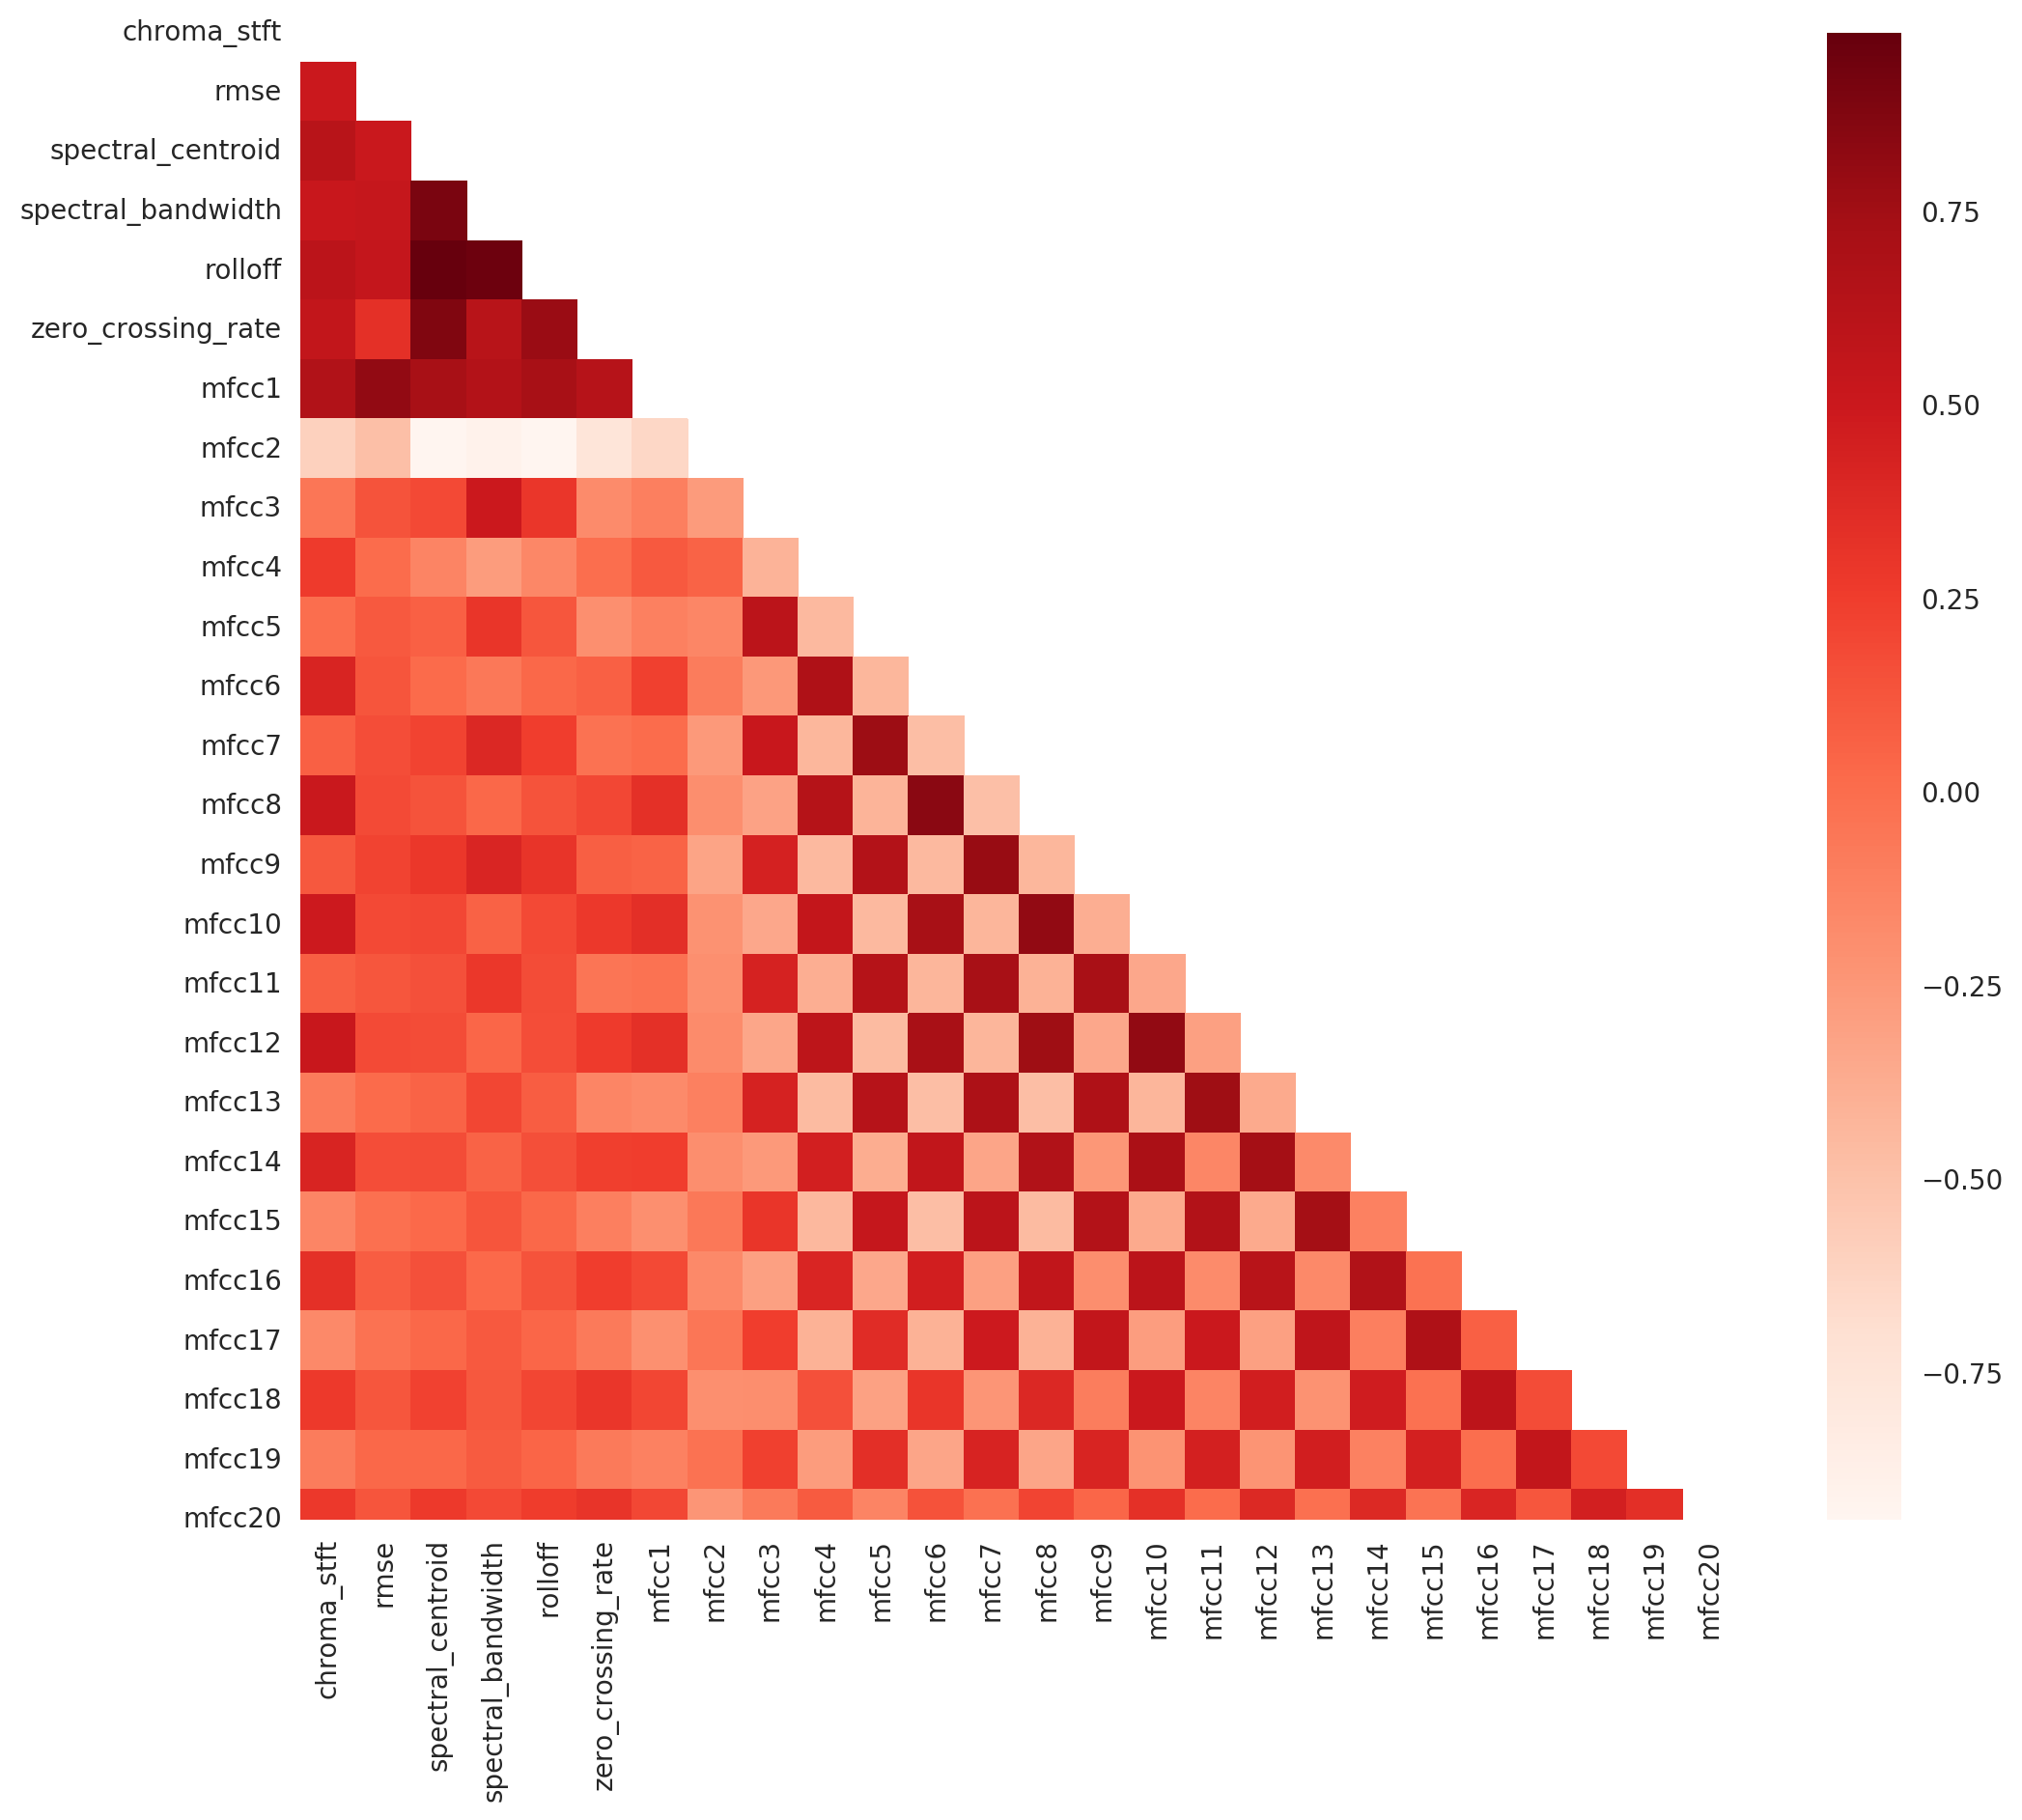

chroma_stft           0.615641
rmse                  0.509984
spectral_centroid     1.000000
spectral_bandwidth    0.904438
rolloff               0.979633
zero_crossing_rate    0.874755
mfcc1                 0.720831
mfcc2                 0.940171
Name: spectral_centroid, dtype: float64

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
feature_cor = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(feature_cor, dtype=bool))

sns.heatmap(feature_cor, annot=False, mask=mask, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
feature_cor_target = abs(feature_cor["spectral_centroid"])
#Selecting highly correlated features
relevant_features = feature_cor_target[feature_cor_target>0.5]
relevant_features
